In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from londonbss.ml_logic.loadprocessing import get_processed_data
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries

In [3]:
station_sele = 'wormwood_street__liverpool_street'

In [4]:
df = get_processed_data(min_date='2020-01-01', max_date='2023-06-19',station=station_sele)


 ⭐️ Use case: preprocess

Load data from local CSV...
Data loaded, with shape (30793839, 4)
✅ Data cleaned
✅ Balance matrix created


/home/sebasmar/code/elsebasmar/london-bss/londonbss/ml_logic/features.py:48: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  london_events_filtered['start_date']=pd.to_datetime(london_events_filtered['start_date'])
/home/sebasmar/code/elsebasmar/london-bss/londonbss/ml_logic/features.py:49: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  london_events_filtered['end_date']=pd.to_datetime(london_events_filtered['end_date'])


✅ Raw features adquired.

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_trips_full_data_4...:
✅ Data saved to bigquery, with shape (30297, 851)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_features_full_data_4...:
✅ Data saved to bigquery, with shape (31152, 23)

⭐️ Processing Data Starting ...

Loading preprocessed data...

Data stored locally in CSV...

⭐️ Getting processed Data...

Load data from local CSV...
Data loaded, with shape (30360, 25)

Processed data loaded and a copy was saved locally


In [5]:
df.head()

,startdate,elisabeth_line,lockdown,strike,school_holidays,daytime,London_zone_Central,London_zone_North,London_zone_West,London_zone_South_West,...,snowfall,cloudcover,wind_speed,wind_direction,year,month,day,hour,weekday,wormwood_street__liverpool_street
0,2020-01-01 00:00:00,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.66,0.208609,0.323120,2020.0,1.0,1.0,0.0,2.0,2.0
1,2020-01-01 01:00:00,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.61,0.187086,0.334262,2020.0,1.0,1.0,1.0,2.0,2.0
2,2020-01-01 02:00:00,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.63,0.157285,0.328691,2020.0,1.0,1.0,2.0,2.0,1.0
3,2020-01-01 03:00:00,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.71,0.137417,0.298050,2020.0,1.0,1.0,3.0,2.0,2.0
4,2020-01-01 04:00:00,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.84,0.120861,0.278552,2020.0,1.0,1.0,4.0,2.0,-1.0


In [6]:
df.dtypes

startdate                            datetime64[ns]
elisabeth_line                              float64
lockdown                                    float64
strike                                      float64
school_holidays                             float64
daytime                                     float64
London_zone_Central                         float64
London_zone_North                           float64
London_zone_West                            float64
London_zone_South_West                      float64
London_zone_South_East                      float64
London_zone_East                            float64
Event                                       float64
temperature                                 float64
rainfall                                    float64
snowfall                                    float64
cloudcover                                  float64
wind_speed                                  float64
wind_direction                              float64
year        

In [7]:
series = TimeSeries.from_dataframe(df, time_col='startdate', value_cols=station_sele,
                                   fill_missing_dates=True, freq='H', fillna_value=0)

<Axes: xlabel='startdate'>

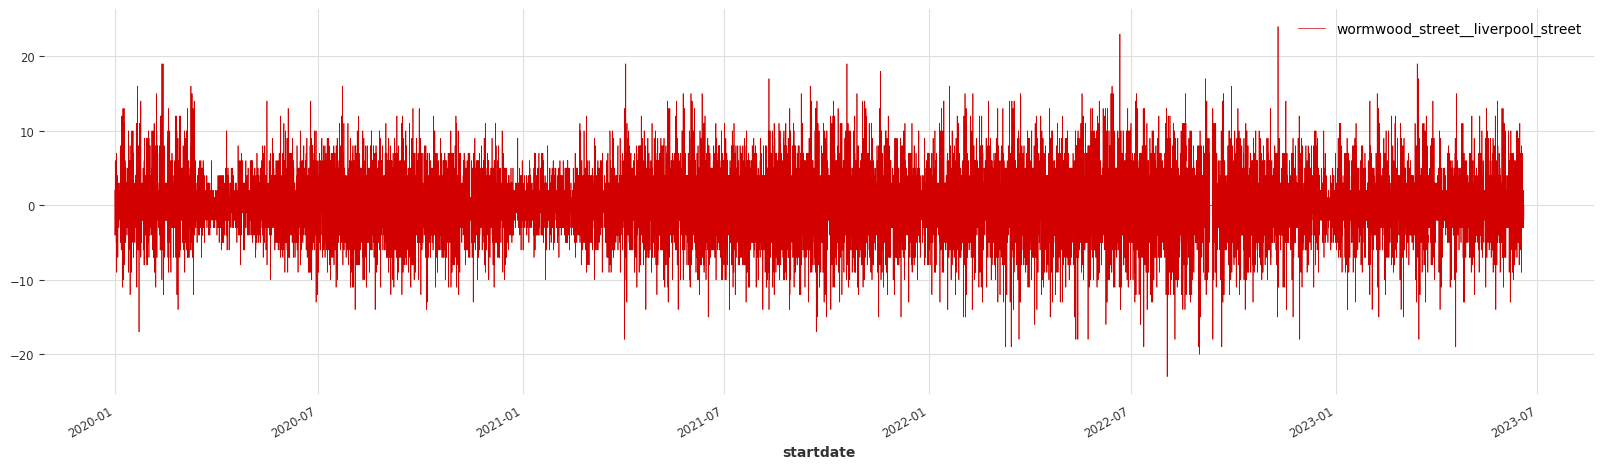

In [8]:
plt.figure(figsize=(20, 5))
series.plot(c='#D30000',linewidth=0.5)

<Axes: xlabel='startdate'>

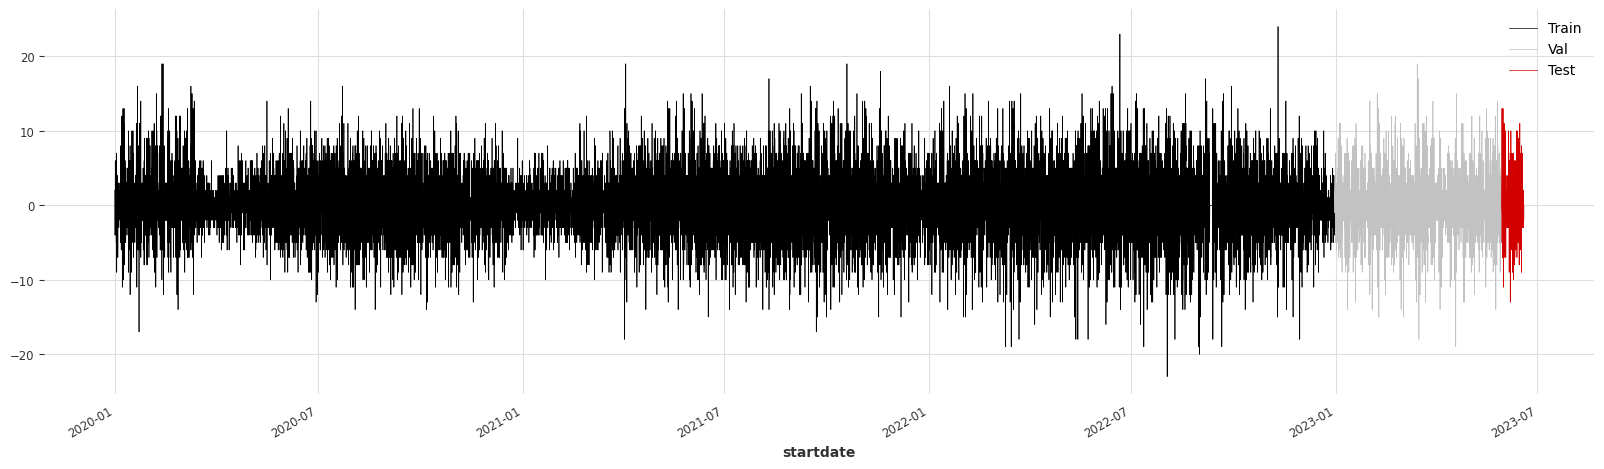

In [18]:
train, valt = series.split_before(pd.Timestamp('20221231'))
val, test = valt.split_before(pd.Timestamp('20230530'))
plt.figure(figsize=(20, 5))
train.plot(linewidth=0.5, label='Train')
val.plot(linewidth=0.5, label='Val', c='#C2C2C2')
test.plot(linewidth=0.5, label='Test', c='#D30000')

<Axes: xlabel='startdate'>

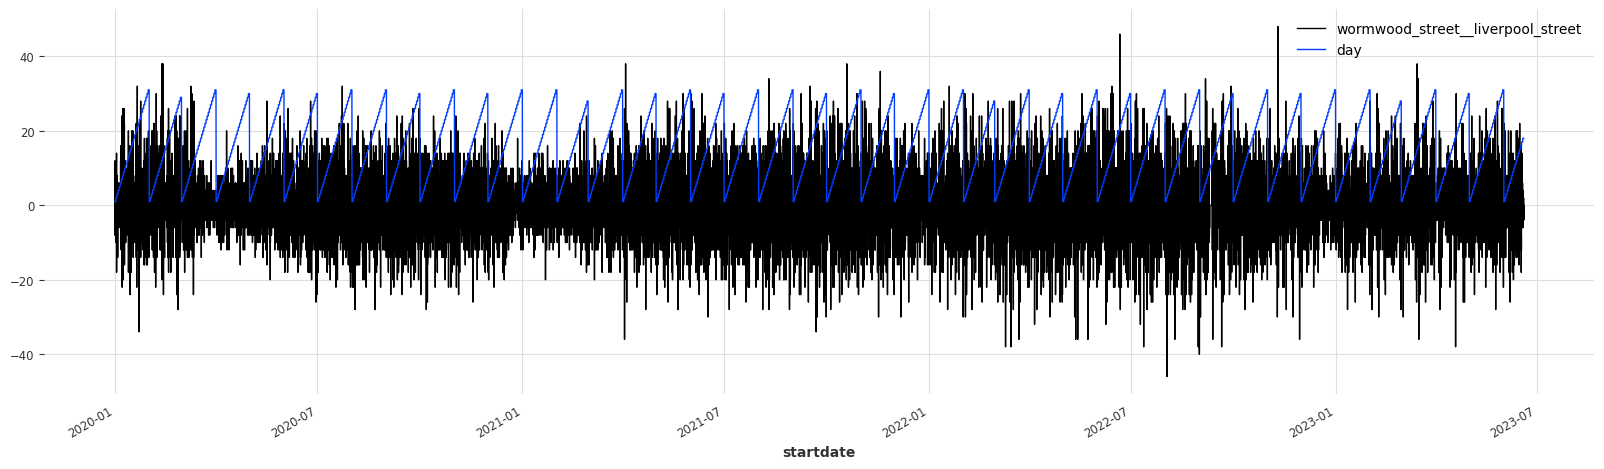

In [19]:
plt.figure(figsize=(20, 5))
(series / 0.5).add_datetime_attribute("day").plot(linewidth=1)

<Axes: xlabel='startdate'>

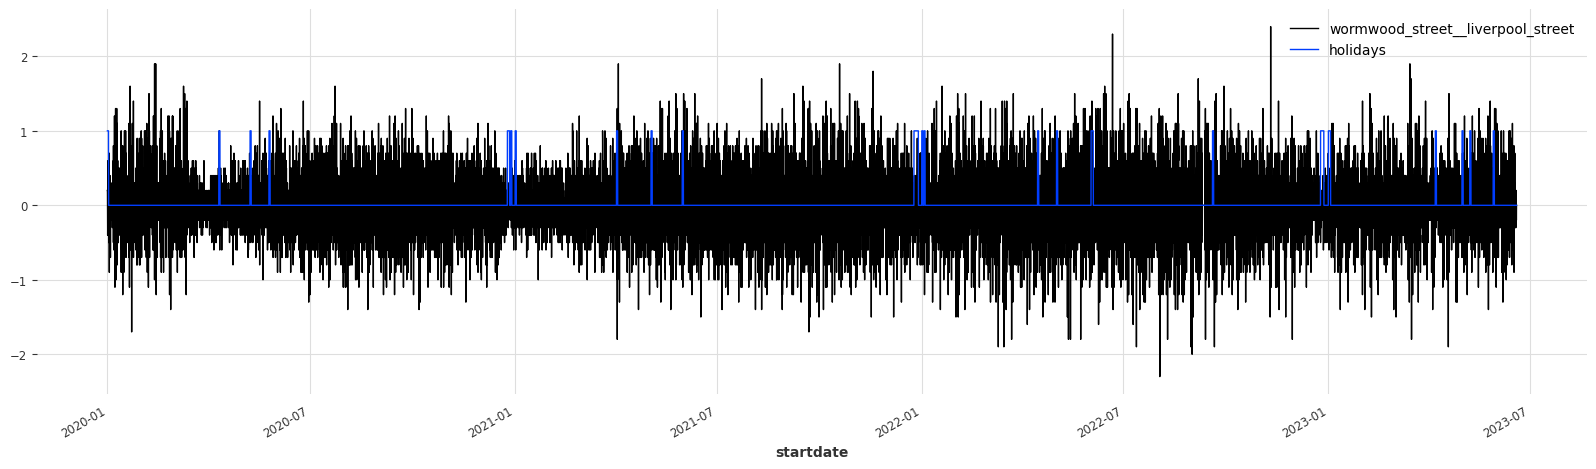

In [20]:
plt.figure(figsize=(20, 5))
(series / 10).add_holidays("UK").plot(linewidth=1)

In [21]:
from darts.models import NaiveSeasonal

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [22]:
from darts.utils.statistics import plot_acf, check_seasonality

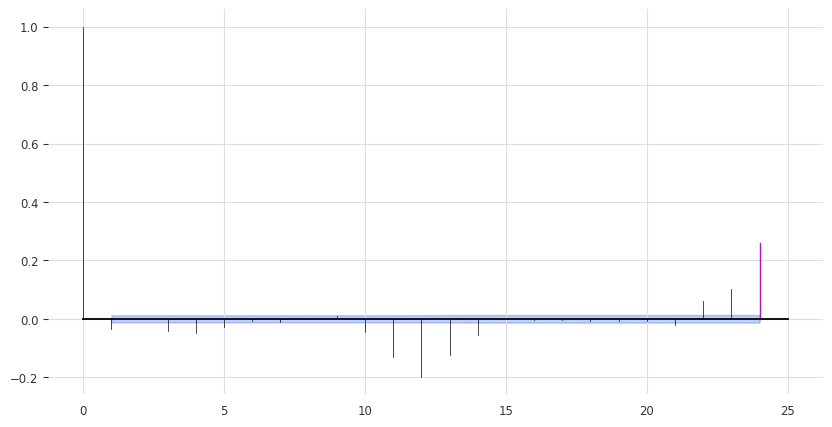

In [23]:
plot_acf(train, m=24, alpha=0.05)

In [24]:
covariates = ['elisabeth_line', 'lockdown','strike', 'school_holidays', 'daytime', 'London_zone_Central',
       'London_zone_North', 'London_zone_West', 'London_zone_South_West',
       'London_zone_South_East', 'London_zone_East', 'Event', 'temperature',
       'rainfall', 'snowfall', 'cloudcover', 'wind_speed', 'wind_direction',
       'year', 'month', 'day', 'hour', 'weekday']

In [25]:
cov_series = TimeSeries.from_dataframe(df, time_col='startdate', 
                                       value_cols=covariates, 
                                       fill_missing_dates=True, freq='H', fillna_value=0)

<Axes: xlabel='startdate'>

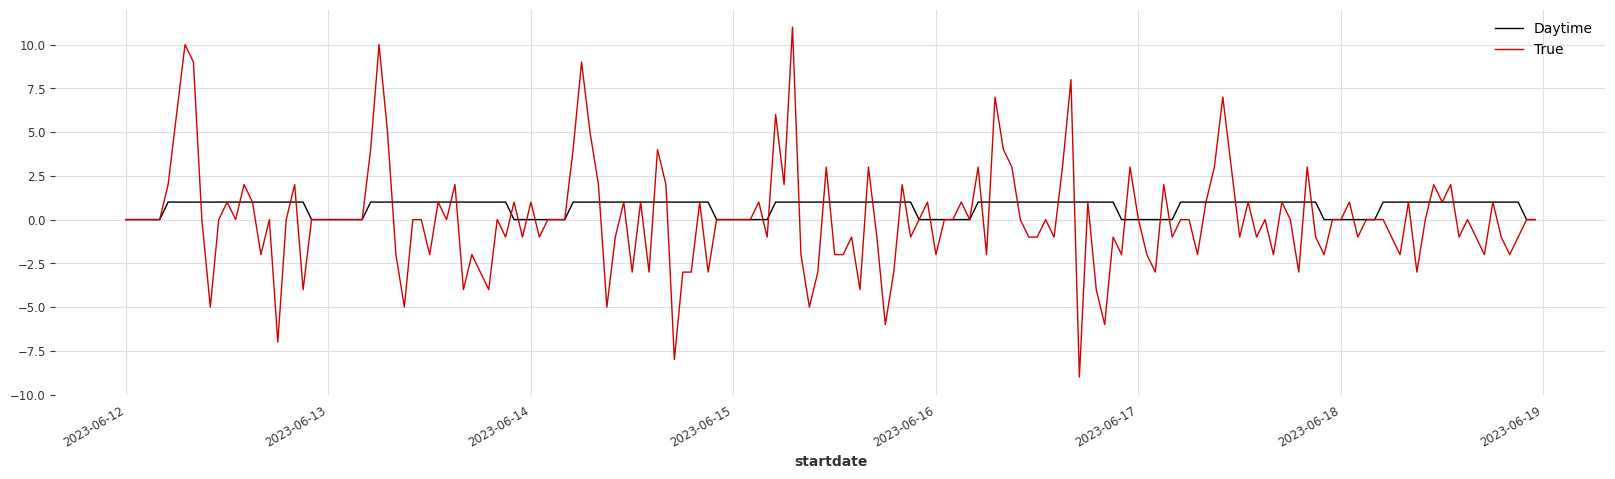

In [26]:
plt.figure(figsize=(20, 5))
cov_series[-168:]['daytime'].plot(linewidth=1, label="Daytime")
series[-168:].plot(linewidth=1, label="True", c='#D30000')

In [31]:
from darts.metrics import mse

In [33]:
seasonal_model = NaiveSeasonal(K=24)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(val))
print("model {} obtains MSE: {:.2f}%".format(seasonal_model, mse(val, seasonal_forecast)))

model NaiveSeasonal(K=24) obtains MSE: 10.83%


In [34]:
traintest = train.append(val)

<Axes: xlabel='startdate'>

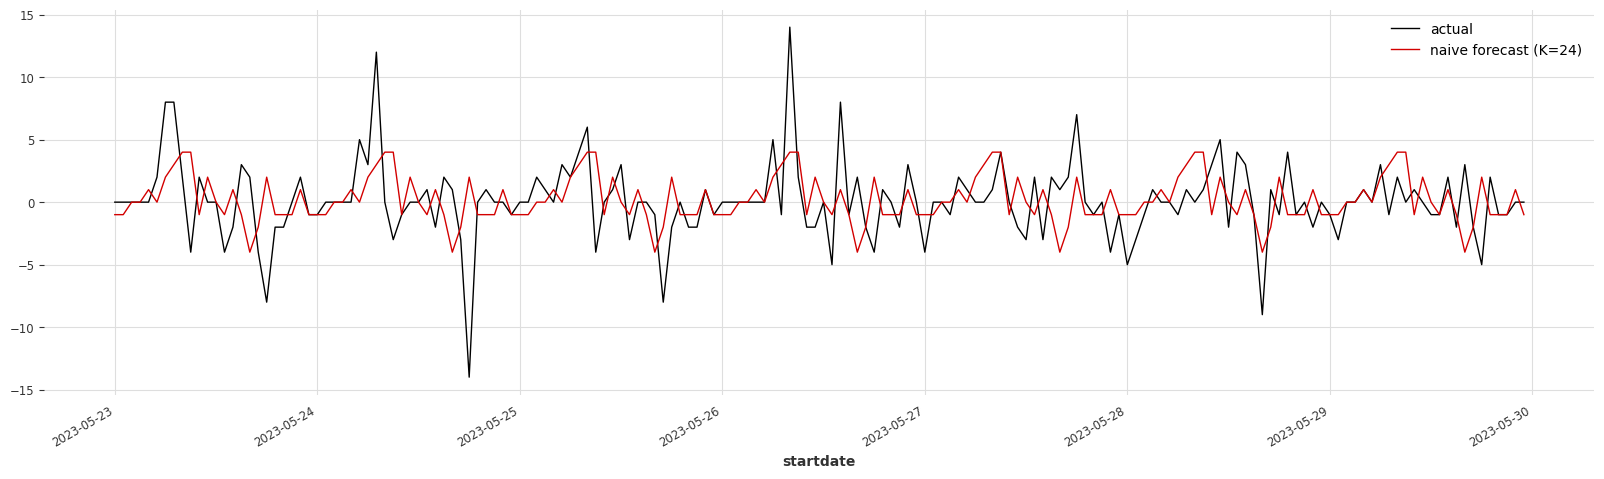

In [35]:
plt.figure(figsize=(20, 5))
traintest[-168:].plot(linewidth=1, label="actual")
seasonal_forecast[-168:].plot(linewidth=1, label="naive forecast (K=24)", c='#D30000')

In [36]:
from darts.models import Prophet, ExponentialSmoothing, AutoARIMA, NBEATSModel

In [38]:
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mse(val, forecast)))

In [43]:
eval_model(Prophet(add_seasonalities={
        'name':"daily_seasonality",
        'seasonal_periods':24,
        'fourier_order':1
        }))

12:36:04 - cmdstanpy - INFO - Chain [1] start processing
12:36:06 - cmdstanpy - INFO - Chain [1] done processing


model Prophet(add_seasonalities={'name': 'daily_seasonality', 'seasonal_periods': 24, 'fourier_order': 1}) obtains MAPE: 7.73%


In [47]:
eval_model(ExponentialSmoothing(seasonal_periods=24))

model ExponentialSmoothing(seasonal_periods=24) obtains MAPE: 7.77%


In [48]:
eval_model(AutoARIMA())

model AutoARIMA() obtains MAPE: 9.44%


In [53]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# stop training when validation loss does not decrease more than 0.05 (`min_delta`) over
# a period of 5 epochs (`patience`)
my_stopper = EarlyStopping(
    monitor="train_loss",
    patience=5,
    min_delta=0.05,
    mode='min',
)

pl_trainer_kwargs={"callbacks": [my_stopper]}

In [65]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50)

In [66]:
model.fit(
    train,
    past_covariates=cov_series,
    verbose=True
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 10.6 M
---------------------------------------------------
10.6 M    Trainable params
4.7 K     Non-trainable params
10.6 M    Total params
42.341    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=50)

In [67]:
pred = model.predict(series=train, n=len(val))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='startdate'>

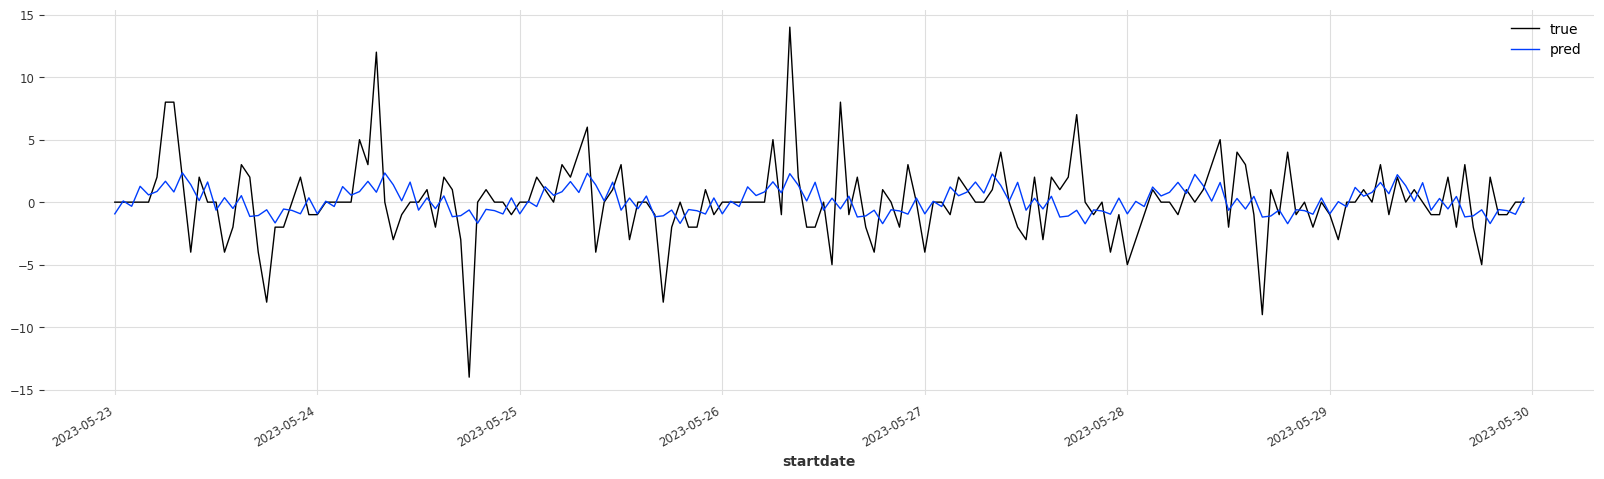

In [68]:
plt.figure(figsize=(20, 5))
traintest[-168:].plot(linewidth=1, label="true")
pred[-168:].plot(linewidth=1, label="pred")